In [1]:
import numpy as np
import pandas as pd

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot


In [9]:
colnames=['Case_ID registered in Hospital',  'Unique code for the Hospital', 'Unique code for the type of Hospital', 'City Code of the Hospital', 'Region Code of the Hospital', 'Number of Extra rooms available in the Hospital', 'Department overlooking the case', 'Code for the Ward type', 'Code for the Ward Facility', 'Condition of Bed in the Ward', 'Unique Patient Id', 'City Code for the patient', 'Admission Type registered by the Hospital', 'Severity of the illness recorded at the time of admission', 'Number of Visitors with the patient', 'Age of the patient', 'Deposit at the Admission Time', 'Stay Days by the patient'] 

df = pd.read_csv("hospital_train.csv", names=colnames, header=None)

In [2]:
df = pd.read_csv("hospital_train.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [11]:
df = df.iloc[1: , :]
df

,Case_ID registered in Hospital,Unique code for the Hospital,Unique code for the type of Hospital,City Code of the Hospital,Region Code of the Hospital,Number of Extra rooms available in the Hospital,Department overlooking the case,Code for the Ward type,Code for the Ward Facility,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Admission Type registered by the Hospital,Severity of the illness recorded at the time of admission,Number of Visitors with the patient,Age of the patient,Deposit at the Admission Time,Stay Days by the patient
1,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
2,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
3,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
4,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
5,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99997,254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
99998,69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40
99999,204442,32,f,9,Y,2,gynecology,S,B,4.0,113798,15.0,Trauma,Moderate,3,41-50,5092.0,11-20


In [13]:
df['Severity of the illness recorded at the time of admission'].unique()

array(['Moderate', 'Extreme', 'Minor'], dtype=object)

In [16]:
df['Admission Type registered by the Hospital'].unique()

array(['Urgent', 'Trauma', 'Emergency'], dtype=object)

In [19]:
df['Age of the patient'].unique()

array(['21-30', '51-60', '71-80', '11-20', '31-40', '0-10', '61-70',
       '41-50', '81-90', '91-100'], dtype=object)

In [3]:
# Usé esta definición de columnas 
df_prueba = df.copy()
df_prueba["18"] = df['13'].map({'Moderate': 1, 'Extreme': 2, 'Minor': 0 })

In [4]:
df_prueba["19"] = df['12'].map({'Urgent': 0, 'Trauma': 2, 'Emergency': 1 })

In [5]:
df_prueba["20"] = df['15'].map({'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 8  })

In [6]:
df_prueba

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,161528,6,a,6,X,2,gynecology,R,F,4.0,...,2.0,Urgent,Moderate,2,21-30,2817.0,0-10,1,0,2
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,...,15.0,Trauma,Moderate,4,51-60,4498.0,21-30,1,2,5
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,...,5.0,Urgent,Moderate,2,71-80,4573.0,11-20,1,0,7
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,...,6.0,Emergency,Moderate,4,11-20,7202.0,51-60,1,1,1
4,147791,14,a,1,X,3,gynecology,S,E,2.0,...,8.0,Urgent,Moderate,2,51-60,3398.0,51-60,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,a,9,Y,3,gynecology,R,B,3.0,...,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days,1,1,5
99996,254763,28,b,11,X,2,gynecology,R,F,2.0,...,5.0,Urgent,Moderate,3,21-30,4005.0,51-60,1,0,2
99997,69788,6,a,6,X,3,gynecology,Q,F,3.0,...,2.0,Trauma,Minor,2,31-40,5215.0,31-40,0,2,3
99998,204442,32,f,9,Y,2,gynecology,S,B,4.0,...,15.0,Trauma,Moderate,3,41-50,5092.0,11-20,1,2,4


In [46]:
df_prueba.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')

### correlacion de columnas

<AxesSubplot:>

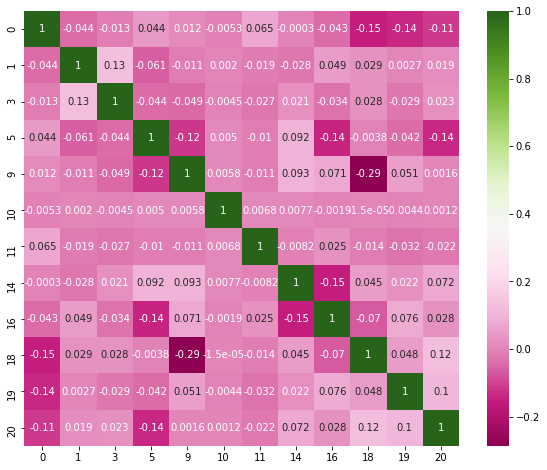

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df_prueba.corr()

plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap = "PiYG", annot = True, square=True)


In [ ]:
X = np.array(df_prueba  [['Severity_of_the_illness','Admission_Type','Age','Number of Extra rooms available in the Hospital', 'clarity_value', 'color_value', 'cut_value' ]])
y = np.array(diamonds_df['Stay Days by the patient'])
X.shape

### 1. Definir X e y

In [7]:
X = np.array(df_prueba[['20','19','18','5' ]])
y = np.array(df_prueba['17'])
X.shape

(100000, 4)

### 2. Dividir X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Evaluación del modelo de conjunto de apilamiento 

In [9]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn',KNeighborsClassifier()), ('cart', DecisionTreeClassifier()), ( 'svc', SVC())
                       
]

In [10]:

clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, stratify=y, random_state=42
 )


In [11]:
clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\Mary\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2966

### 2. Carga los datos  para predecir.

In [12]:
X_pred_1 = pd.read_csv("hospital_test.csv")
X_pred_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0


In [13]:
X_pred_1["18"] = X_pred_1['13'].map({'Moderate': 1, 'Extreme': 2, 'Minor': 0 })

In [14]:
X_pred_1["19"] = X_pred_1['12'].map({'Urgent': 0, 'Trauma': 2, 'Emergency': 1 })

In [15]:
X_pred_1["20"] = X_pred_1['15'].map({'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 8  })

In [16]:
X_pred_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0,0,1,4
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0,1,2,3
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0,0,1,7
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0,2,0,3
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0,0,0,5
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0,1,1,6
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0,0,2,3
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0,2,2,3


In [17]:
X

array([[2, 0, 1, 2],
       [5, 2, 1, 4],
       [7, 0, 1, 2],
       ...,
       [3, 2, 0, 3],
       [4, 2, 1, 2],
       [4, 1, 1, 3]], dtype=int64)

In [18]:
X_pred = np.array(X_pred_1[['20','19','18','5' ]])

In [19]:
X_pred

array([[4, 1, 0, 4],
       [3, 2, 1, 3],
       [7, 1, 0, 4],
       ...,
       [3, 2, 0, 3],
       [3, 2, 2, 4],
       [5, 2, 1, 4]], dtype=int64)

In [20]:
predictions_submit = clf.predict(X_pred)
predictions_submit

array(['11-20', '21-30', '21-30', ..., '11-20', '21-30', '21-30'],
      dtype=object)

In [21]:
y_pred = clf.predict(X_train)

In [22]:
clf.score(X_test, y_test) 

0.2966

In [25]:
score = accuracy_score(y_train, y_pred)
score

0.3032666666666667

In [24]:
sample = pd.read_csv("sample_submission.csv")

In [29]:
sample

,id,days
0,314114,11-20
1,208989,31-40
2,305872,81-90
3,266099,21-30
4,13228,31-40
...,...,...
133739,318155,41-50
133740,144850,21-30
133741,180676,11-20
133742,39933,21-30


In [43]:
submission = pd.DataFrame({"id": X_pred_1.iloc[:, 0], "days": predictions_submit})

In [44]:
submission.head()

,id,days
0,314114,11-20
1,208989,21-30
2,305872,21-30
3,266099,21-30
4,13228,11-20


In [45]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [46]:
chequeator(submission)

You're ready to submit!
